# Predicting Student Performance EDA - starting notebook

This is a starting point for the EDA.

In [1]:
#importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#ggplot
plt.style.use('ggplot')

#inline
%matplotlib inline

#increase the number of columns to be shown
pd.set_option("display.max_columns", None)

#statistics 
from scipy import stats

In [2]:
eng = pd.read_csv("../finalDatasets/Student Engagement Level-Binary (1).csv")
perf = pd.read_csv("../finalDatasets/Student Performance Prediction-Multi (1).csv")

In [3]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student ID         486 non-null    object
 1   Quiz01 [10]        486 non-null    int64 
 2   Assignment01 [8]   486 non-null    int64 
 3   Midterm Exam [20]  486 non-null    int64 
 4   Assignment02 [12]  486 non-null    int64 
 5   Assignment03 [25]  486 non-null    int64 
 6   Final Exam [35]    486 non-null    int64 
 7   Course Grade       486 non-null    int64 
 8   Total [100]        486 non-null    int64 
 9   Class              486 non-null    object
dtypes: int64(8), object(2)
memory usage: 38.1+ KB


In [4]:
perf.head().style.background_gradient()

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G


In [5]:
perf.describe().T.drop("count", axis=1).style.background_gradient()

,mean,std,min,25%,50%,75%,max
Quiz01 [10],77.901235,13.683406,0.000000,70.000000,80.000000,85.000000,100.000000
Assignment01 [8],75.479424,17.733496,0.000000,68.250000,79.000000,87.000000,99.000000
Midterm Exam [20],77.109053,11.987383,0.000000,70.000000,80.000000,85.000000,98.000000
Assignment02 [12],77.133745,15.179633,0.000000,72.000000,81.000000,87.000000,97.000000
Assignment03 [25],80.870370,12.986498,0.000000,77.000000,83.000000,89.000000,100.000000
Final Exam [35],62.181070,14.938642,0.000000,53.000000,64.000000,73.000000,93.000000
Course Grade,80.382716,11.267032,15.000000,75.000000,83.000000,88.000000,100.000000
Total [100],80.487654,11.282449,15.000000,75.000000,83.000000,88.000000,102.000000


Both data is clean and include no null values. We will not need any imputation etc.

My first thought is that the performance data has columns related to eachother, and will cause multicollinearity. It is obvious that "Course Grade" and "Total" columns are the same, and columns between indices 1 to 7 are quiz, assignment etc scores which are used to calculate the course grade scores. From the performance data we should use **Course grade** and **class**. 

In [6]:
# eng data
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   # Logins                                      486 non-null    int64  
 2   # Content Reads                               486 non-null    int64  
 3   # Forum Reads                                 486 non-null    int64  
 4   # Forum Posts                                 486 non-null    int64  
 5   # Quiz Reviews before submission              486 non-null    int64  
 6   Assignment 1 lateness indicator               486 non-null    int64  
 7   Assignment 2 lateness indicator               486 non-null    int64  
 8   Assignment 3 lateness indicator               486 non-null    int64  
 9   Assignment 1 duration to submit (in hours)    486 non-null    flo

Logins, content reads etc all the columns are numeric until assignment lateness indicators. However, It cannot be 25,6 visit to a web page, but in my experience it would be better to keep these forum things as integers. 
However, Assignment lateness indicators are binary data, so I changed them to categories - if we use them for prediction purposes **don't forget to convert them to integers again**

In [7]:
columns_to_convert = eng.iloc[:,6:9].columns
for col in columns_to_convert:
    eng[col] = eng[col].astype("object")

In [8]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   # Logins                                      486 non-null    int64  
 2   # Content Reads                               486 non-null    int64  
 3   # Forum Reads                                 486 non-null    int64  
 4   # Forum Posts                                 486 non-null    int64  
 5   # Quiz Reviews before submission              486 non-null    int64  
 6   Assignment 1 lateness indicator               486 non-null    object 
 7   Assignment 2 lateness indicator               486 non-null    object 
 8   Assignment 3 lateness indicator               486 non-null    object 
 9   Assignment 1 duration to submit (in hours)    486 non-null    flo

In [9]:
eng.describe().style.background_gradient()

,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours)
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,79.897119,271.843621,2.156379,0.146091,2.045267,227.659499,136.916324,168.520953,177.698925
std,41.293639,106.180726,8.898293,0.606881,1.964113,96.342083,82.754479,101.934682,88.394268
min,0.000000,34.000000,0.000000,0.000000,0.000000,50.883333,6.200000,18.716667,36.327778
25%,58.000000,196.000000,0.000000,0.000000,1.000000,147.066667,58.708333,85.558333,99.620833
50%,74.000000,252.500000,0.000000,0.000000,2.000000,191.033333,102.791667,128.133333,144.741667
75%,95.000000,338.750000,0.000000,0.000000,3.000000,306.045833,212.112500,236.616667,250.500000
max,647.000000,1007.000000,58.000000,6.000000,12.000000,558.000000,296.250000,632.000000,495.333333


In [10]:
eng.describe(exclude=["int", "float"]).drop("Student ID",axis=1).style.background_gradient()

,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Engagement Level
count,486,486,486,486
unique,2,2,2,2
top,0,0,0,H
freq,474,474,479,259


### Data Merging
I think we can merge both datasets

In [11]:
df = perf.merge(eng, left_on = "Student ID", right_on= "Student ID", how= "left")

In [12]:
df.sample(n=20)

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
192,student000192,80,83,88,84,75,69,85,85,G,67,154,0,0,1,0,0,0,145.850000,55.433333,79.550000,93.611111,H
421,student000421,90,93,88,89,81,74,91,91,G,106,276,11,0,5,0,0,0,124.333333,32.216667,55.033333,70.527778,H
437,student000437,80,74,68,66,51,63,70,70,G,54,287,0,0,2,0,0,0,158.266667,63.166667,90.850000,104.094444,H
123,student000123,75,88,63,83,76,60,77,77,G,55,391,0,0,1,0,0,0,303.833333,191.533333,260.083333,251.816667,L
269,student000269,75,0,55,69,85,66,71,71,G,90,268,0,0,8,1,0,0,558.000000,128.300000,127.100000,271.133333,L
381,student000381,100,74,88,82,74,70,86,86,G,107,612,0,0,0,0,0,0,119.600000,30.850000,51.883333,67.444444,H
424,student000424,70,71,83,81,80,71,84,84,G,56,218,0,0,0,0,0,0,140.333333,48.833333,107.516667,98.894444,H
135,student000135,85,68,73,78,75,71,82,82,G,107,344,0,0,1,0,0,0,135.466667,44.300000,67.866667,82.544444,H
133,student000133,85,85,88,83,78,66,85,85,G,85,146,0,0,1,0,0,0,146.850000,54.033333,69.050000,89.977778,H
107,student000107,70,99,73,91,92,60,84,84,G,89,255,0,0,0,0,0,0,327.966667,240.483333,263.366667,277.272222,L


In [13]:
# check if course grade and total are different or not
(df["Course Grade"] - df["Total [100]"]).value_counts()

 0    423
-1     54
 1      7
-2      2
Name: count, dtype: int64

In [14]:
df[(df["Total [100]"] > df["Course Grade"])].style.highlight_max(subset = ["Total [100]", "Course Grade"], color = "red")

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
10,student000010,90,93,88,87,90,73,92,93,G,91,264,0,0,5,0,0,0,276.933333,235.833333,255.833333,256.200000,L
12,student000012,80,86,63,78,75,37,68,69,F,42,97,0,0,1,0,0,0,332.066667,240.450000,265.533333,279.350000,L
31,student000031,70,79,85,84,100,69,89,90,G,87,326,0,0,2,0,0,0,297.833333,209.566667,230.466667,245.955556,L
32,student000032,80,86,63,69,83,49,73,74,G,86,243,10,0,3,0,0,0,359.016667,240.116667,264.900000,288.011111,L
39,student000039,75,90,75,86,84,73,86,87,G,66,208,0,0,0,0,0,0,182.783333,95.633333,125.750000,134.722222,H
43,student000043,90,78,83,93,84,73,89,90,G,123,358,0,0,4,0,0,0,136.516667,45.516667,79.150000,87.061111,H
55,student000055,85,74,65,66,65,43,66,67,F,84,136,0,0,2,0,0,0,279.516667,185.200000,208.400000,224.372222,L
62,student000062,80,56,68,59,65,69,73,74,G,33,211,0,0,1,0,0,0,139.583333,51.133333,212.733333,134.483333,H
74,student000074,85,83,78,82,90,67,86,87,G,94,356,0,0,2,0,0,0,325.266667,235.500000,260.216667,273.661111,L
93,student000093,90,72,93,83,75,70,86,87,G,74,197,0,0,7,0,0,0,194.383333,101.100000,114.516667,136.666667,H


In [15]:
df[(df["Total [100]"] < df["Course Grade"])]

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
3,student000003,80,78,80,79,79,57,80,79,G,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
126,student000126,75,69,73,73,65,51,71,70,G,55,184,0,0,5,0,0,0,195.533333,103.150000,120.750000,139.811111,H
315,student000315,70,66,80,87,77,47,75,74,G,46,194,0,0,2,0,0,0,306.800000,189.133333,212.200000,236.044444,L
342,student000342,95,96,90,78,92,74,94,93,G,73,215,0,0,0,0,0,0,304.916667,188.566667,212.866667,235.450000,L
357,student000357,70,66,70,79,81,41,71,70,G,58,212,0,0,1,0,0,0,141.816667,47.233333,74.250000,87.766667,H
427,student000427,70,89,83,76,91,71,88,87,G,138,186,0,0,1,0,0,0,156.183333,62.416667,91.850000,103.483333,H
433,student000433,75,83,75,87,82,84,90,89,G,58,118,0,0,0,0,0,0,195.233333,103.616667,127.383333,142.077778,H


In [16]:
# student000433
75 * 0.1 + 83 * 0.08 + 75 * 0.2 + 87 * 0.12 + 82 * 0.25 + 84 * 0.35

89.47999999999999

### Course Grade and Total

It seems the lecturer rounded up the Course Grade to nearest high integer. However, some student's grade are lowered. I calculated some of them by hand, for instance student000433 (you can see the output there) course grade is 89.47. The course grade was filled by rounding up to nearest higher integer, but total accepted nearest integer. So it is better to keep Total [100] column here.

Some students passed the class with 102 Total Grade, also these will be changed to 100.


In [17]:
# drop course grade
df.drop("Course Grade", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   Quiz01 [10]                                   486 non-null    int64  
 2   Assignment01 [8]                              486 non-null    int64  
 3   Midterm Exam [20]                             486 non-null    int64  
 4   Assignment02 [12]                             486 non-null    int64  
 5   Assignment03 [25]                             486 non-null    int64  
 6   Final Exam [35]                               486 non-null    int64  
 7   Total [100]                                   486 non-null    int64  
 8   Class                                         486 non-null    object 
 9   # Logins                                      486 non-null    int

## Visuals 

### Numeric variables

In [27]:
def plot_hist(columns: list, df, fig_width = 15, fig_height = 20):
    """
    This function plots histograms for given column list from dataframe df.
    The output will be a plot shaped n x 2 where n is len(columns)/2
    
    Parameters:
    columns: a list item for column names
    df: pandas dataframe object
    fig_height: height of the figure
    fig_width = width of the figure
    """
    nrows = len(columns) // 2
    ncols = 2
    
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(fig_width, fig_height))
    
    
    for i in range(nrows):
        for n in range(ncols):
            # Plot histograms for each column
            column = columns[i * 2 + n] 
            sns.histplot(df[column], bins = 50, ax= axs[i, n])
            axs[i, n].set_title(column)


    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()

In [25]:
column_list = df.select_dtypes(exclude="object").columns

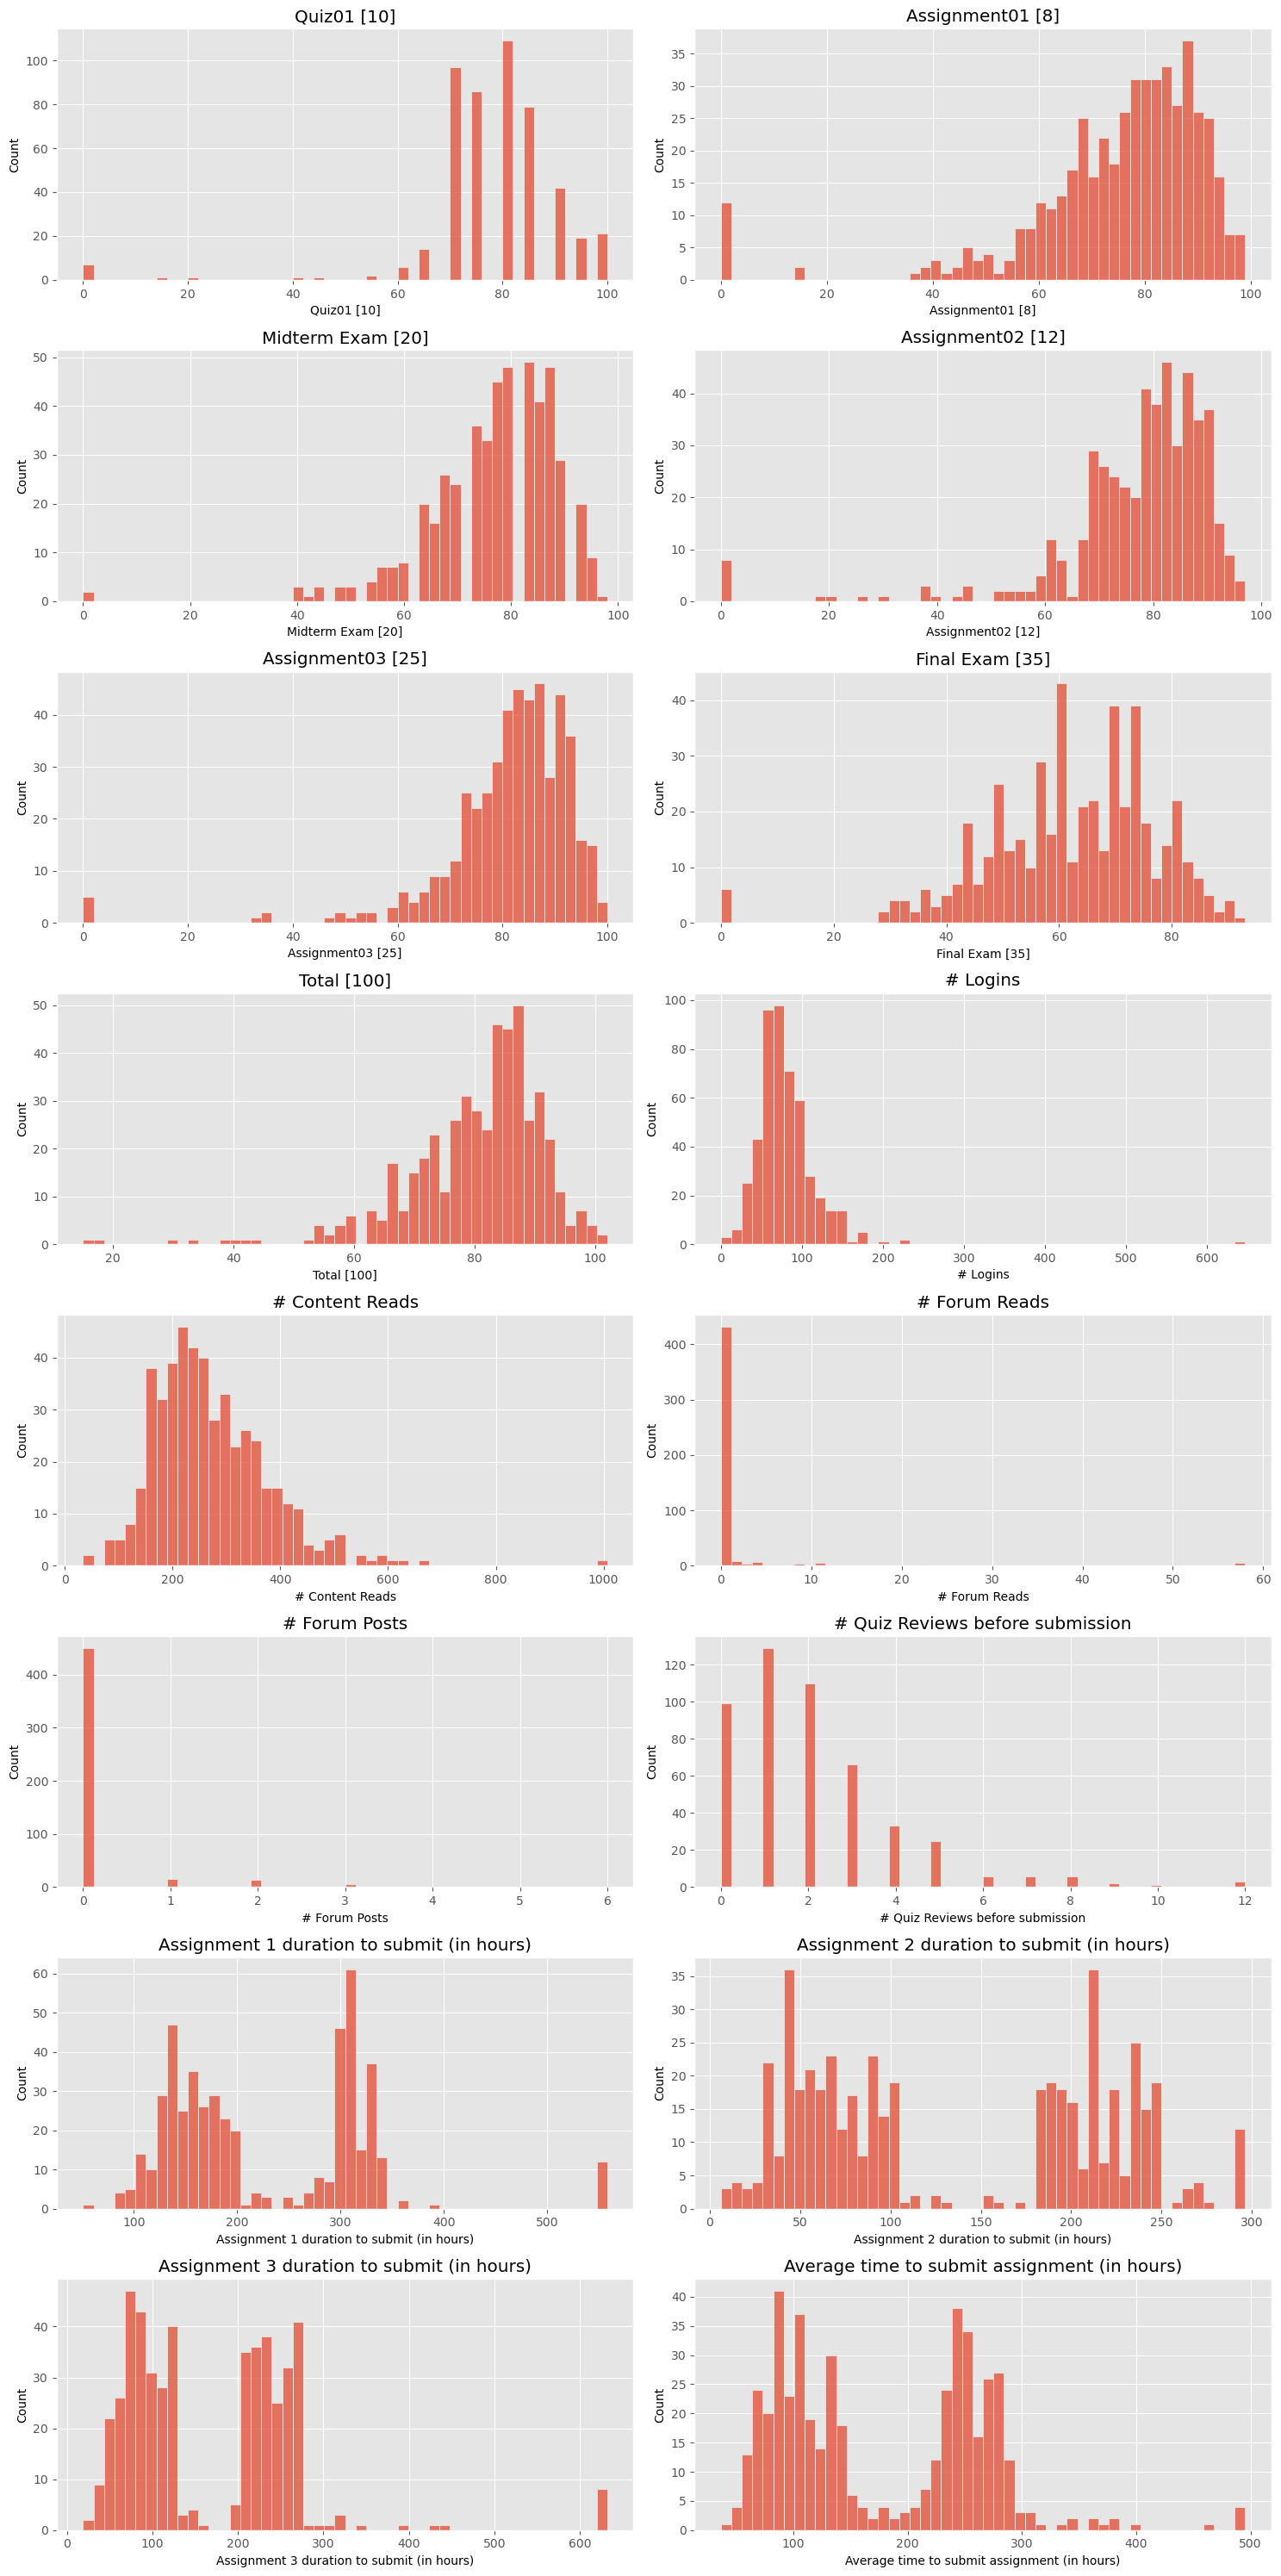

In [29]:
plot_hist(column_list, df, fig_height= 30)

In [34]:
obj_columns = df.select_dtypes(include="object").drop(["Student ID","Class", "Engagement Level"], axis=1).columns

In [45]:
obj_columns

Index(['Assignment 1 lateness indicator', 'Assignment 2 lateness indicator',
       'Assignment 3 lateness indicator'],
      dtype='object')

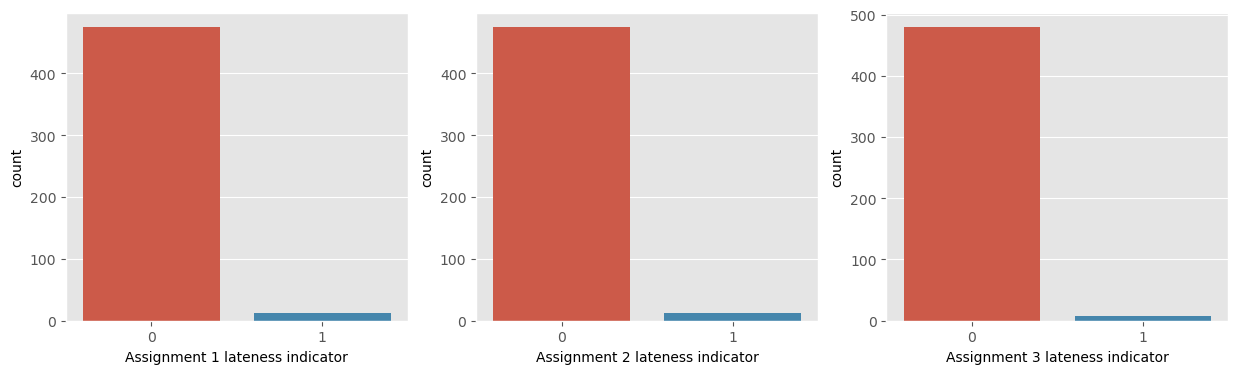

In [59]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,4))

sns.countplot(data = df, x = "Assignment 1 lateness indicator", ax= ax1)
sns.countplot(data = df, x = "Assignment 2 lateness indicator", ax= ax2)
sns.countplot(data = df, x = "Assignment 3 lateness indicator", ax= ax3)


plt.show()
